Customer Data Columns: ['CustomerID', 'CustomerName', 'Region', 'SignupDate']
Product Data Columns: ['ProductID', 'ProductName', 'Category', 'Price']
Transaction Data Columns: ['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price']

Missing Values in Customer Data:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Product Data:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transaction Data:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Merged Data Sample:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067   2024-04-25 7:38:55    

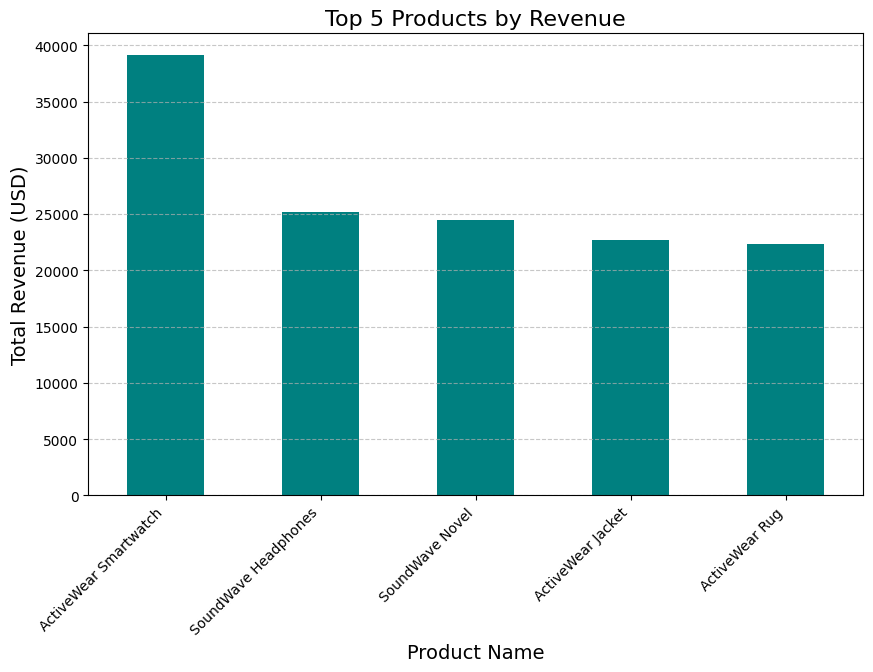


Top 10 High-Value Customers:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


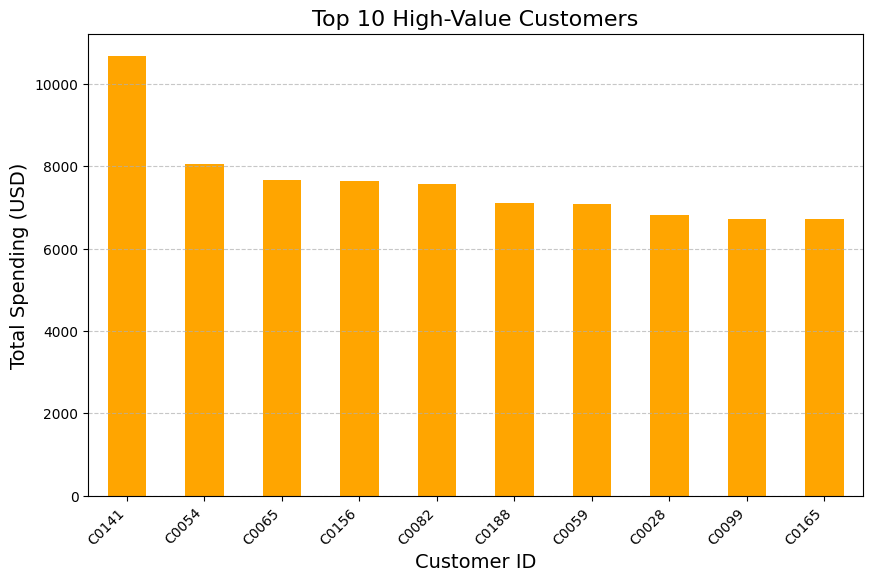


Regional Sales Distribution:
Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


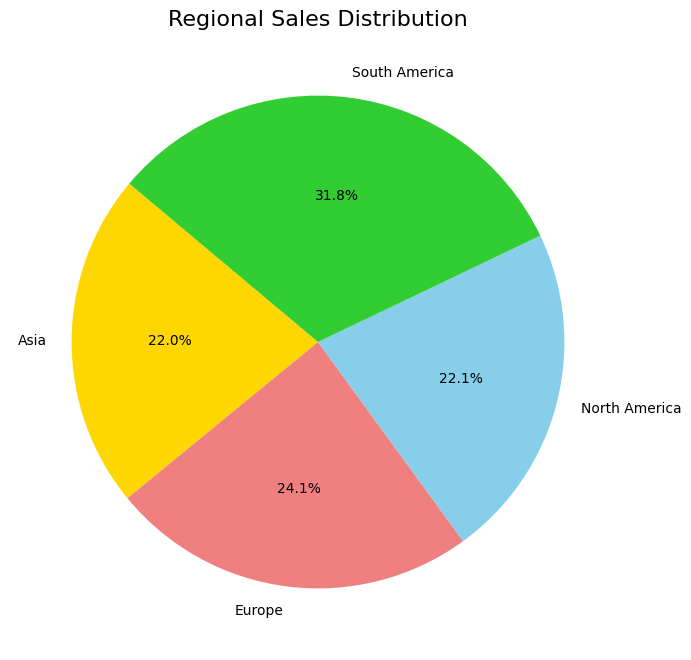


Monthly Sales Trends:
TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


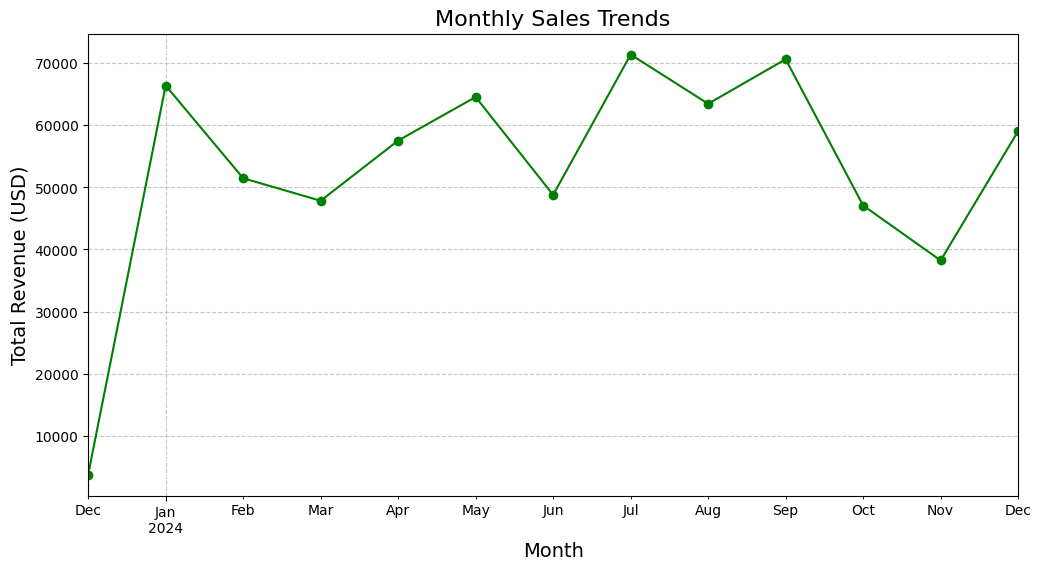


Revenue by Product Category:
Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64


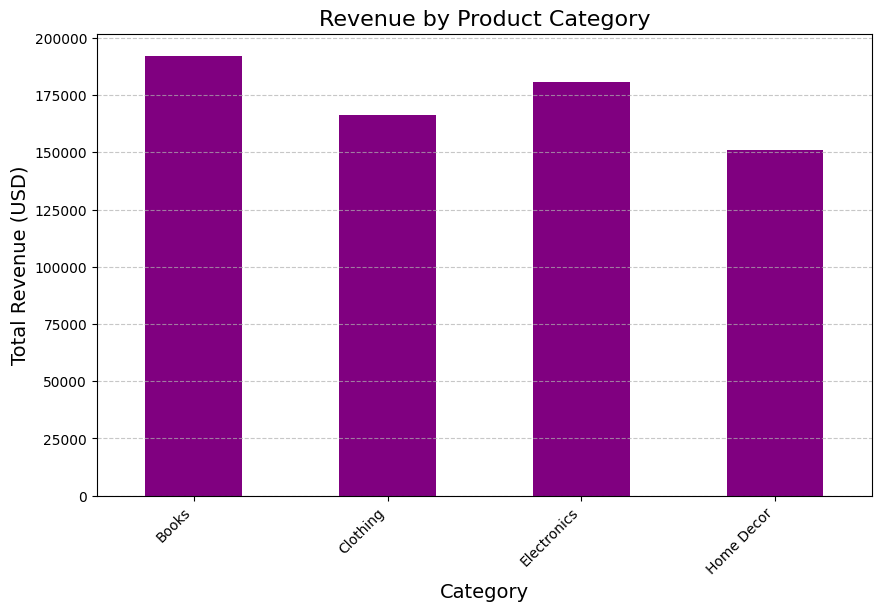


Combined dataset saved as 'Combined_Analysis_Data.csv'.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
customer_data = pd.read_csv("Customers.csv")
product_data = pd.read_csv("Products.csv")
transaction_data = pd.read_csv("Transactions.csv")

# Display dataset columns
print("Customer Data Columns:", customer_data.columns.tolist())
print("Product Data Columns:", product_data.columns.tolist())
print("Transaction Data Columns:", transaction_data.columns.tolist())

# Inspect missing values
print("\nMissing Values in Customer Data:")
print(customer_data.isnull().sum())

print("\nMissing Values in Product Data:")
print(product_data.isnull().sum())

print("\nMissing Values in Transaction Data:")
print(transaction_data.isnull().sum())

# Merge datasets for comprehensive analysis
combined_data = transaction_data.merge(customer_data, on='CustomerID').merge(product_data, on='ProductID')
print("\nMerged Data Sample:")
print(combined_data.head())

# Insight 1: Top Products by Revenue
top_selling_products = combined_data.groupby('ProductName')['TotalValue'].sum().nlargest(5)
print("\nTop 5 Products by Revenue:")
print(top_selling_products)

# Plot top products
plt.figure(figsize=(10, 6))
top_selling_products.plot(kind='bar', color='teal')
plt.title('Top 5 Products by Revenue', fontsize=16)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Total Revenue (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Insight 2: High-Value Customers
top_customers = combined_data.groupby('CustomerID')['TotalValue'].sum().nlargest(10)
print("\nTop 10 High-Value Customers:")
print(top_customers)

# Plot high-value customers
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='orange')
plt.title('Top 10 High-Value Customers', fontsize=16)
plt.xlabel('Customer ID', fontsize=14)
plt.ylabel('Total Spending (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Insight 3: Regional Sales Distribution
regional_sales = combined_data.groupby('Region')['TotalValue'].sum()
print("\nRegional Sales Distribution:")
print(regional_sales)

# Plot regional sales
plt.figure(figsize=(8, 8))
regional_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'skyblue', 'limegreen'])
plt.title('Regional Sales Distribution', fontsize=16)
plt.ylabel('')
plt.show()

# Insight 4: Monthly Sales Trends
combined_data['TransactionDate'] = pd.to_datetime(combined_data['TransactionDate'])
monthly_sales = combined_data.groupby(combined_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print("\nMonthly Sales Trends:")
print(monthly_sales)

# Plot monthly trends
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue (USD)', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Insight 5: Revenue by Product Category
category_revenue = combined_data.groupby('Category')['TotalValue'].sum()
print("\nRevenue by Product Category:")
print(category_revenue)

# Plot category revenue
plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar', color='purple')
plt.title('Revenue by Product Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Revenue (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Save merged data for further analysis
combined_data.to_csv('Combined_Analysis_Data.csv', index=False)
print("\nCombined dataset saved as 'Combined_Analysis_Data.csv'.")